# Milestone 1

### Objective
* Mampu memahami konsep supervised learning
* Mampu mempersiapkan data untuk digunakan dalam model supervised learning
* Mampu mengimplementasikan supervised learning dengan data yang diberikan
* Mampu melakukan evaluasi model
* Mampu melakukan model tuning

## I. Perkenalan
* Nama: Anugrah Yoga P
* Batch: FTDS-010
* Dataset: bank-additional-full.csv

## II. Import Pustaka

Import pustaka.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_roc_curve, roc_auc_score, classification_report, f1_score, accuracy_score

## III. Data Loading

Load data dari local.

In [3]:
df0 = pd.read_csv('bank-additional-full.csv', sep=';')
df = df0.copy() #Copy data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Cek ukuran dataset.

In [4]:
print(f'Ukuran dari dataset adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

Ukuran dari dataset adalah 41188 baris dan 21 kolom


Cek informasi kolom.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## IV. Exploratory Data Analysis

Cek ringkasan statistik deskriptif dari dataset.

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Cek nama-nama kolom dataset.

In [7]:
print('Nama-nama kolom pada dataset:')
for col in df.columns:
    print(f'{col}')

Nama-nama kolom pada dataset:
age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
y


Membuat fungsi untuk plot distribusi histogram dan boxplot dan membuat fungsi untuk mengembalikan nilai skew.

In [8]:
def hist_boxplot(dataseries, color):
    plt.figure(figsize=(9, 9))
    #Plot Distribusi Histogram
    plt.subplot(2, 1, 1)
    sns.histplot(dataseries, bins=30, color=color, kde=True)
    plt.title(f'Distribusi Data {dataseries.name.capitalize()}')
    plt.xlabel(dataseries.name)
    plt.ylabel('Frequency')
    plt.xlim(xmin=dataseries.min(), xmax=dataseries.max())
    
    #Boxplot
    plt.subplot(2, 1, 2)
    sns.boxplot(dataseries, orient='h', color=color)
    plt.xlim(xmin=dataseries.min(), xmax=dataseries.max())
    plt.show()

# Print nilai skewness
def skew_check(dataseries):
    skew = dataseries.skew()
    return skew

def plot_stat(numcol, color):
    warnings.filterwarnings("ignore")
    hist_boxplot(df[numcol], color)
    skew = skew_check(df[numcol])
    print(f'Nilai skew {numcol}  : {skew_check(df[numcol]):.3f}')
    if (skew > 0.5) | (skew < -0.5):
        if skew > 0.5:
            print(f'Distribusi {numcol} : Skew Positif')
        else:
            print(f'Distribusi {numcol} : Skew Negatif')
    else:
        print(f'Distribusi {numcol} : Normal')
    print(df.describe()[numcol])
    print(f"persentase outlier {numcol} : {outlier_pct(df[numcol]):.2f}%")

Membuat fungsi untuk mengembalikan nama-nama kolom kategori atau numerik.

In [9]:
# fungsi kolom kategori
def object_col(dataFrame):
    objcol = dataFrame.select_dtypes(include=['object', 'category', 'datetime']).columns.to_list()
    return objcol

# fungsi kolom numerik
def numeric_col(dataFrame):
    numcol = dataFrame.select_dtypes(include='number').columns.to_list()
    return numcol

Membuat fungsi untuk mengembalikan batas outlier atas dan bawah dan membuat fungsi untuk mengembalikan persentase outlier pada sebuah data.

In [10]:
# fungsi mengeluarkan upper lower dari outlier
def outlier(datacol):
    q1, q3 = datacol.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    return lower, upper

# fungsi menghitung persentase outlier
def outlier_pct(datacol):
    lower = outlier(datacol)[0]
    upper = outlier(datacol)[1]
    outlier_data = datacol[((datacol < lower) | (datacol > upper))] # data outlier
    len_out = len(outlier_data) # jumlah data outlier
    len_data = len(datacol) # jumlah semua data
    return len_out/len_data*100

Membuat fungsi untuk mengembalikan jumlah missing value dan persentase missing value pada sebuah kolom data.

In [11]:
# fungsi menghitung jumlah dan persentase missing value
def missval_pct(datacol):
    count_missval = datacol.isna().sum()
    pct = count_missval/len(df)*100
    return count_missval, pct

Lihat list nama kolom kategori beserta unique value di setiap kolomnya.

In [12]:
print('Nama-nama kolom kategorik:')
for objcol in object_col(df):
    print(f'{objcol} : {df[objcol].unique()}')

Nama-nama kolom kategorik:
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


Disini terlihat bahwa ada beberapa kolom yang memiliki 'unknown' value. Value ini dapat dijadikan missing value.

In [13]:
df.replace('unknown', np.nan, inplace=True)

Berikut adalah persentase missing value untuk setiap kolom.

In [14]:
print('Missing value percentage:')
for col in df.columns:
    if missval_pct(df[col])[0] > 0:
        print(f'{col} : {missval_pct(df[col])[1]:.2f}% or {missval_pct(df[col])[0]} data')

Missing value percentage:
job : 0.80% or 330 data
marital : 0.19% or 80 data
education : 4.20% or 1731 data
default : 20.87% or 8597 data
housing : 2.40% or 990 data
loan : 2.40% or 990 data


Sekarang terlihat bahwa terdapat 6 fitur yang memiliki missing value. Ada yang unik disini yaitu fitur housing dan loan memiliki jumlah missing value yang sama yaitu 990. Kita ingin cek apakah kedua missing value ini ada di baris yang sama atau tidak.

In [15]:
df[(df['housing'].isna() == True) & (df['loan'].isna() == True)].head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,NaN,married,university.degree,NaN,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,NaN,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,NaN,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,NaN,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
470,42,technician,single,professional.course,NaN,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
485,36,admin.,married,university.degree,no,NaN,NaN,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
494,32,admin.,single,university.degree,NaN,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
495,31,services,married,high.school,NaN,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
501,33,admin.,married,basic.9y,no,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Teryata terdapat 990 baris yang kedua fitur yakni housing dan loan adalah missing value.

Jika diperhatikan terdapat nilai 999 di kolom pdays yang menggambarkan klien tidak pernah dihubungi.

In [16]:
df['pdays'].value_counts()/len(df['pdays'])

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

> Ternyata ada 96% lebih value 999 yang ada pada kolom pdays. Fitur pdays merupakan jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya dan angka 999 ini berarti klien tidak pernah dihubungi sebelumnya.

Melihat list nama-nama kolom numerik.

In [17]:
print('Nama-nama kolom numerik:')
for numcol in numeric_col(df):
    print(f'{numcol}')

Nama-nama kolom numerik:
age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


### Uji Hipotesis

#### Kategorik

Kita ingin menyelidiki hubungan antara kolom kategorik dengan target, apakah ada keterkaitan antara keduanya dengan menggunakan uji hipotesis chi square ($χ^2$). Level significant yang digunakan sebesar 5%.

* Hipotesis null $H_{0}$ yaitu tidak terdapat hubungan (**independent**) antara kolom $i$ dengan label y. Sedangkan hipotesis alternatif $H_i$ yaitu terdapat hubungan (**dependent**) antara kolom $i$ dengan label y.
* Secara umum, jika dituliskan sebagai berikut:
$$ H_0 : \text{fitur ketegori-i dengan label y adalah independent}$$
$$ H_i : \text{fitur ketegori-i dengan label y adalah dependent}$$

Mari kita definisikan terlebih dulu fungsi untuk menghitung chi square.

In [18]:
def chi2(datacrosstab):
    stat, pval, dof, expected = stats.chi2_contingency(datacrosstab)
    return stat, pval, dof, expected

Kita bisa langsung melihat nilai p-value untuk setiap kolom dengan targetnya.

In [19]:
print('p-value categorical columns:')
for objcol in object_col(df):
    # Pengecualian kolom y 
    if objcol != 'y':
        # membuat contingency table
        contingency_table = pd.crosstab(df[objcol], df['y'])
        p = chi2(contingency_table)[1]
        alpha = 0.05
        if p < alpha:
            print(f'{objcol} : {p:.2f} (dependent)')
        else:
            print(f'{objcol} : {p:.2f} (indedependent)')

p-value categorical columns:
job : 0.00 (dependent)
marital : 0.00 (dependent)
education : 0.00 (dependent)
default : 1.00 (indedependent)
housing : 0.02 (dependent)
loan : 0.36 (indedependent)
contact : 0.00 (dependent)
month : 0.00 (dependent)
day_of_week : 0.00 (dependent)
poutcome : 0.00 (dependent)


> Dari hasil uji hipotesis chi square antara fitur kategorik dengan target y didapatkan bahwa semua fitur (**kecuali** loan dan default) memiliki nilai p-value lebih kecil dari $α$ yang berarti $H_0$ ditolak yaitu target y dengan kolom tersebut adalah dependent. Sedangkan fitur loan dan default memiliki nilai p-value lebih besar dari $α$ yang berarti $H_0$ gagal ditolak yaitu target y dengan kedua kolom tersebut adalah independent.

#### Numerik

* Hipotesis null $H_{0}$ yaitu jika rata-rata value pada kolom $i$ saat target y bernilai Yes sama dengan rata-rata value pada kolom $i$ saat target y bernilai No. Sedangkan hipotesis alternatif $H_i$ yaitu rata-rata value pada kolom $i$ saat target y bernilai Yes tidak sama dengan rata-rata value pada kolom $i$ saat target y bernilai No.
* Secara umum, jika dituliskan secara matematis sebagai berikut:
$$ H_0 : μ_{i-yes} = μ_{i-no}$$
$$ H_i : μ_{i-yes} \neq μ_{i-no}$$

Uji hipotesis disini menggunakan t-test 2 sample 2 tail karena menggunakan uji dua sampel 'Yes' dan 'No' dengan level significant sebesar 5%.

Mendefinisikan fungsi t_test dengan parameter data1 dan data2 dan mengembalikan t_stats dan p_value.

In [20]:
def t_test(data1, data2):
    t_stat, p_val = stats.ttest_ind(data1, data2, nan_policy='omit')
    return t_stat, p_val

Mencetak semua nilai p-value dari uji hipotesis t-test 2 sampel untuk semua kolom numerik.

In [21]:
print('p-value numerical columns:')
for num_col in numeric_col(df):
    df_yes = df[df['y'] == 'yes'][num_col]
    df_no = df[df['y'] == 'no'][num_col]
    print(f'{num_col} : {t_test(df_yes, df_no)[1]:.2f}')

p-value numerical columns:
age : 0.00
duration : 0.00
campaign : 0.00
pdays : 0.00
previous : 0.00
emp.var.rate : 0.00
cons.price.idx : 0.00
cons.conf.idx : 0.00
euribor3m : 0.00
nr.employed : 0.00


> Semua fitur memiliki p-value < $α$ yang berarti $H_0$ ditolak yaitu terdapat perbedaan antara rata-rata value pada kolom $i$ saat target y bernilai Yes dengan rata-rata value pada kolom $i$ saat target y bernilai No, Semua kolom numerik dapat digunakan.

Cek jumlah value di target y.

In [22]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Text(0.5, 1.0, 'Proporsi Target')

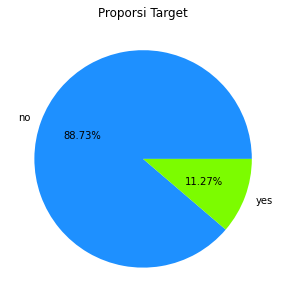

In [23]:
plt.figure(figsize=(5, 5))
plt.pie(df['y'].value_counts(), autopct='%.2f%%', labels=df['y'].value_counts().index, colors=['dodgerblue', 'lawngreen'])
plt.title('Proporsi Target')

> Terlihat bahwa target y memiliki class imbalance.

* Distribusi age

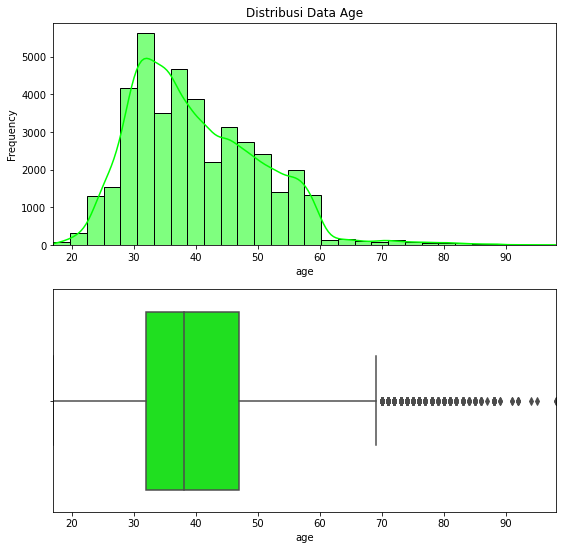

Nilai skew age  : 0.785
Distribusi age : Skew Positif
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
persentase outlier age : 1.14%


In [24]:
plot_stat('age', 'lime')

> Fitur age memiliki distribusi data yang skew positif dan memiliki median 38 tahun. Distribusi datanya juga terdapat outlier dimana persentase outlier terhadap data keseluruhan adalah 1.14%.

* Distribusi duration

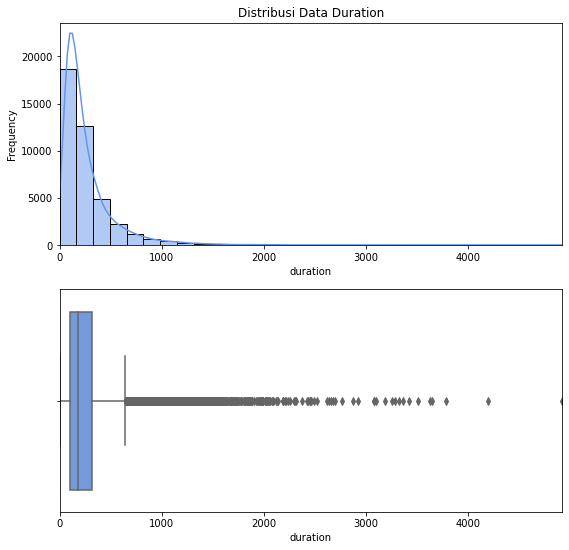

Nilai skew duration  : 3.263
Distribusi duration : Skew Positif
count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
persentase outlier duration : 7.19%


In [25]:
plot_stat('duration', 'cornflowerblue')

> Distribusi duration memiliki sifat skew ekstrem positif dengan median di 180 detik, min 0 detik, dan max 4918 detik. Fitur duration ini menjelaskan durasi kontak terakhir dalam detik. Fitur ini memiliki outlier sebesar 7.19% dari total data dan dengan jumlah yang terbilang banyak.

* Distribusi campaign

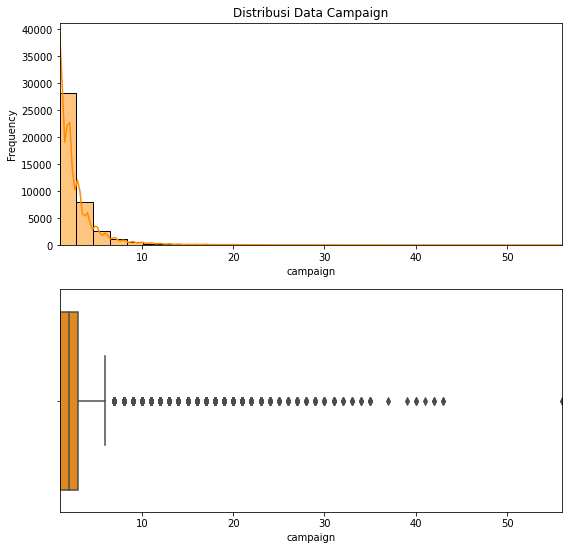

Nilai skew campaign  : 4.763
Distribusi campaign : Skew Positif
count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
persentase outlier campaign : 5.84%


In [26]:
plot_stat('campaign', 'darkorange')

> Distribusi fitur campaign bersifat skew positif, memiliki median 2, min 1, dan max di 56 kali. Distribusi ini mirip dengan distribusi fitur duration dan memiliki persentase outlier sebesar 5.84% dan terbilang cukup banyak.

Kita ingin melihat berapa banyak yang deposito terhadap job.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'entrepreneur'),
  Text(10, 0, 'student')])

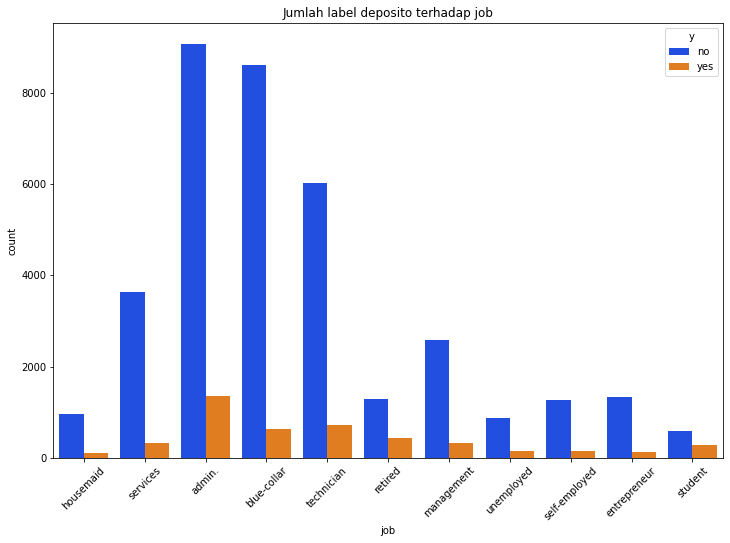

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(x='job', hue='y', data=df, palette=sns.color_palette('bright'))
plt.title('Jumlah label deposito terhadap job')
plt.xticks(rotation=45)

> Berdasarkan plot count di atas untuk semua job, jumlah orang yang tidak memiliki deposito lebih besar daripada jumlah orang yang memiliki deposito dan tipe job yang paling banyak adalah admin, blue-collar, dan technician.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'entrepreneur'),
  Text(10, 0, 'student')])

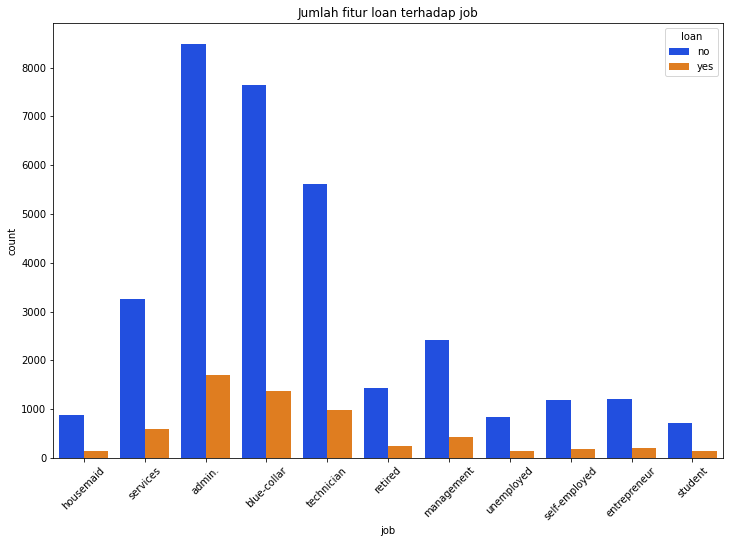

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(x='job', hue='loan', data=df, palette=sns.color_palette('bright'))
plt.title('Jumlah fitur loan terhadap job')
plt.xticks(rotation=45)

> Berdasarkan plot count di atas untuk semua job, jumlah orang yang tidak memiliki personal loan lebih besar daripada jumlah orang yang memiliki personal loan dan tipe job yang paling banyak adalah admin, blue-collar, dan technician.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'entrepreneur'),
  Text(10, 0, 'student')])

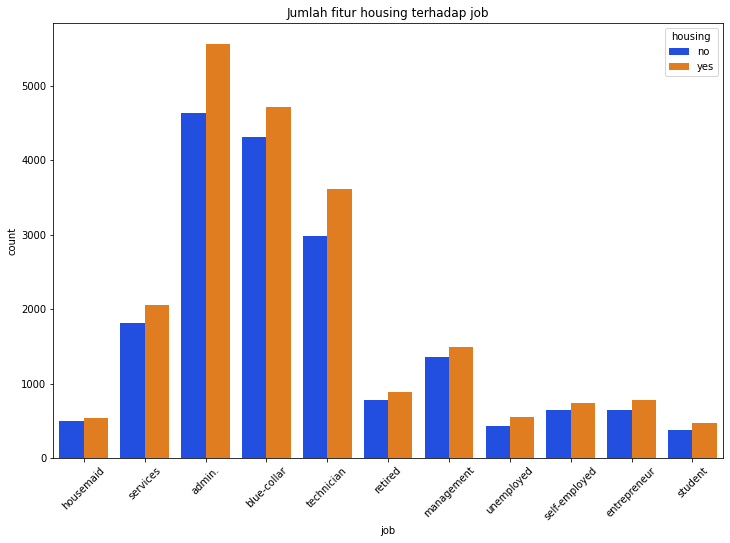

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(x='job', hue='housing', data=df, palette=sns.color_palette('bright'))
plt.title('Jumlah fitur housing terhadap job')
plt.xticks(rotation=45)

> Berdasarkan plot count di atas untuk semua job, jumlah orang yang memiliki housing loan sedikit lebih besar daripada jumlah orang yang tidak memiliki housing loan dan tipe job yang paling banyak adalah admin, blue-collar, dan technician.

In [30]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'university.degree'),
  Text(6, 0, 'illiterate')])

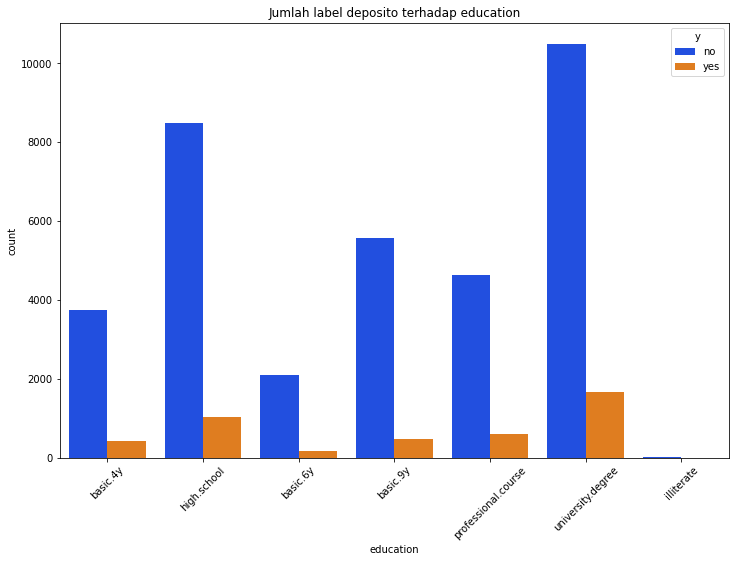

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='y', data=df, palette=sns.color_palette('bright'))
plt.title('Jumlah label deposito terhadap education')
plt.xticks(rotation=45)

> Berdasarkan plot count di atas untuk semua education, jumlah orang yang tidak memiliki deposito lebih banyak daripada jumlah orang yang memiliki deposito dan jumlah paling banyak adalah university degree dan paling sedikit adalah illiterate.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'university.degree'),
  Text(6, 0, 'illiterate')])

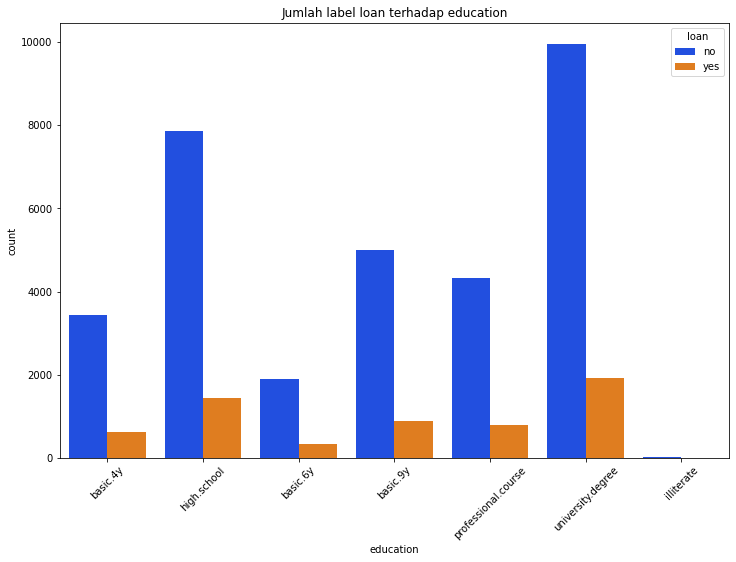

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='loan', data=df, palette=sns.color_palette('bright'))
plt.title('Jumlah label loan terhadap education')
plt.xticks(rotation=45)

> Berdasarkan plot count di atas untuk semua education, jumlah orang yang tidak memiliki personal loan lebih banyak daripada jumlah orang yang memiliki personal loan dan jumlah paling banyak adalah university degree dan paling sedikit adalah illiterate.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'university.degree'),
  Text(6, 0, 'illiterate')])

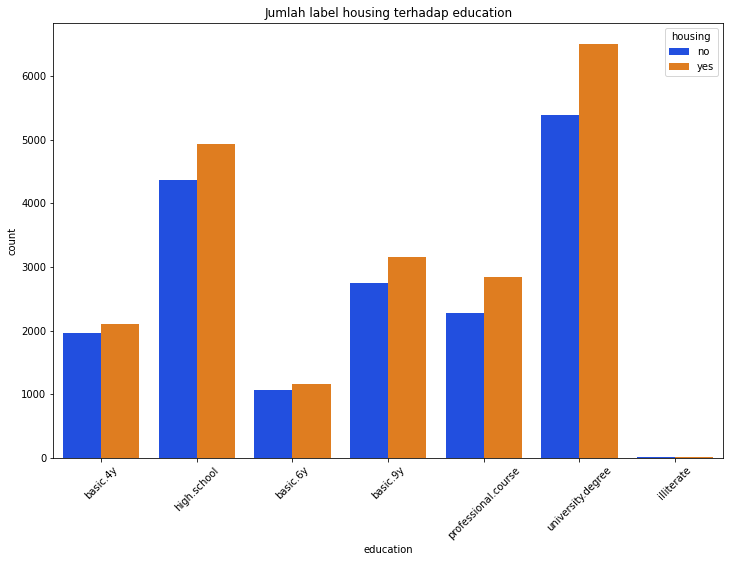

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='housing', data=df, palette=sns.color_palette('bright'))
plt.title('Jumlah label housing terhadap education')
plt.xticks(rotation=45)

> Berdasarkan plot count di atas untuk semua education, jumlah orang yang tidak memiliki housing loan sedikit lebih kecil daripada jumlah orang yang memiliki housing loan dan jumlah paling banyak adalah university degree dan paling sedikit adalah illiterate.

Text(0.5, 1.0, 'Persebaran data age dengan campain')

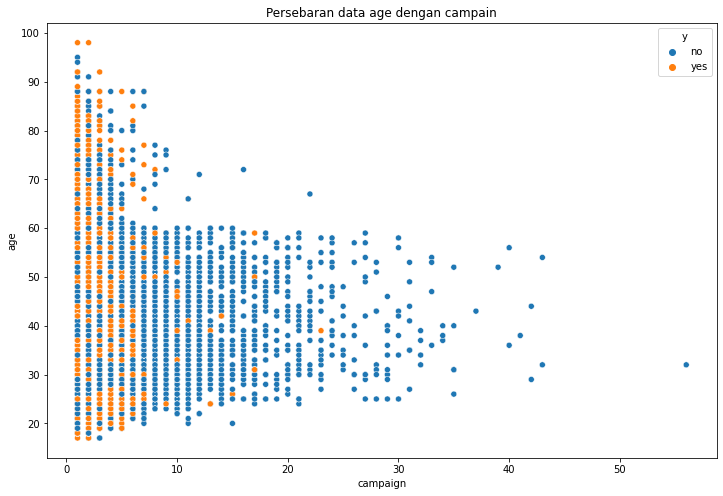

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='campaign', y='age', hue='y', data=df)
plt.title('Persebaran data age dengan campain')

> Plot scatter di atas menunjukkan kumpulan orang yang memiliki deposito ada di semua age dan berada di campaign yang nilainya kecil.

Text(0.5, 1.0, 'Persebaran data age dengan duration')

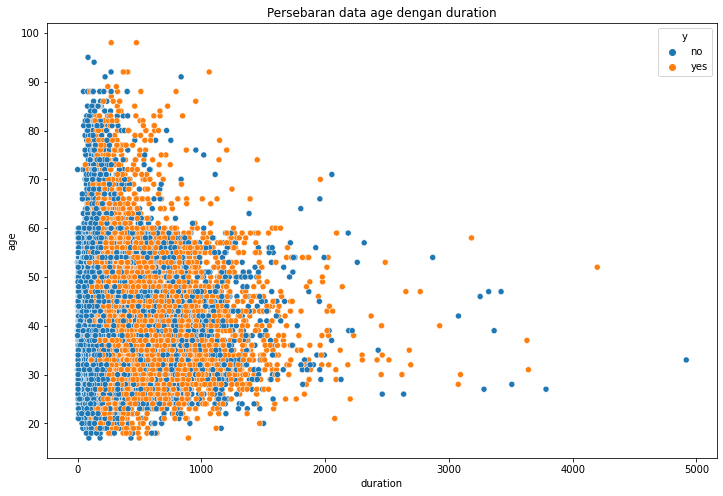

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='duration', y='age', hue='y', data=df)
plt.title('Persebaran data age dengan duration')

> Plot scatter di atas menunjukkan kumpulan orang yang memiliki deposito ada di semua age dan tidak berada di fitur duration yang singkat..

### Korelasi

Text(0.5, 1.0, 'Korelasi antar fitur numerik')

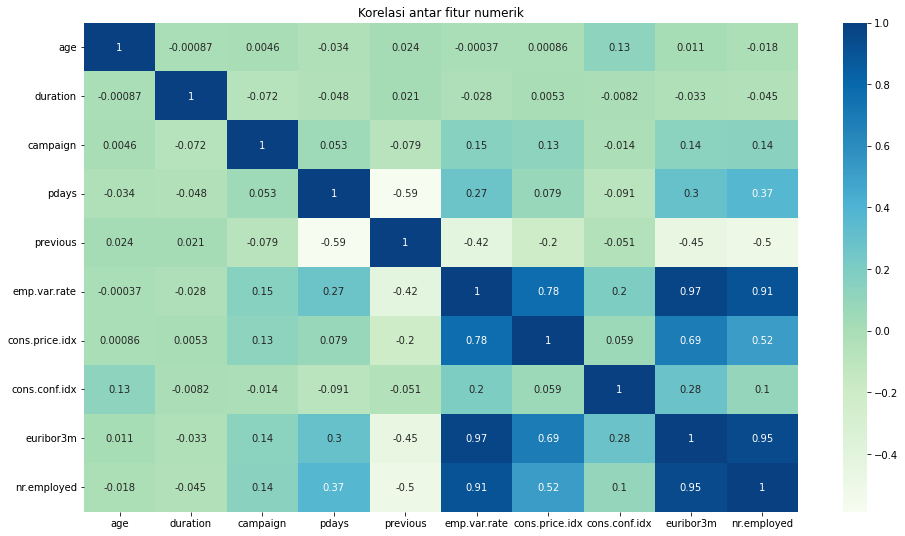

In [36]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True ,cmap='GnBu')
plt.title('Korelasi antar fitur numerik')

Kita bisa mempertimbangkan untuk menghapus fitur nr.employed dan emp.var.rate karena saling berkorelasi. Jika dihapus akan menghasilkan heatmap korelasi sebagai berikut:

Text(0.5, 1.0, 'Korelasi antar fitur numerik')

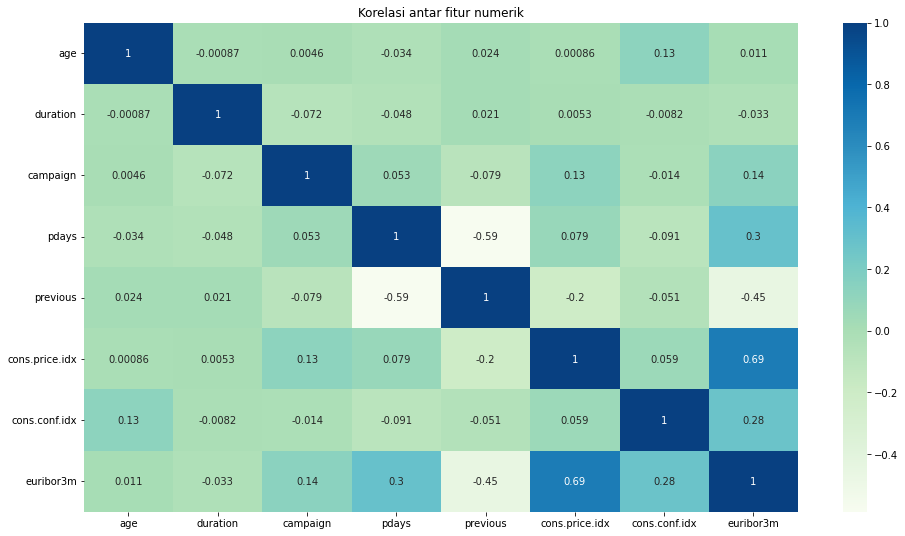

In [37]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.drop(['nr.employed', 'emp.var.rate'], axis=1).corr(), annot=True ,cmap='GnBu')
plt.title('Korelasi antar fitur numerik')

# V. Data Preprocessing

Membuat data inference misalnya sebanyak 8 data dari dataset.

In [38]:
data_inf = df.sample(8, random_state=8)

Drop baris dataset yang sudah digunakan untuk data inferens.

In [39]:
df.drop(data_inf.index, inplace=True)

Reset index untuk dataset dan data inferens.

In [40]:
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Split data menjadi X dan y.

In [41]:
X = df.drop('y', axis=1)
y = df['y']

Split data X dan y menjadi train dan test dengan menggunakan data testing sebesar 20%.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Handling Outliers

Handling outlier yang dilakukan adalah trimming dan winsorizing.

kita cek persentase outlier dari fitur.

In [43]:
for numcol in numeric_col(X_train):
    print(f'{numcol} : {outlier_pct(X_train[numcol]):.2f}%')

age : 1.12%
duration : 7.15%
campaign : 5.93%
pdays : 3.67%
previous : 13.59%
emp.var.rate : 0.00%
cons.price.idx : 0.00%
cons.conf.idx : 1.07%
euribor3m : 0.00%
nr.employed : 0.00%


* Fitur pdays tidak kita handling karena yang termasuk outlier bukan proporsi bagian 3.67% tetapi yang merupakan value 999 dan jumlah value 999 seperti yang ada di EDA adalah 96%.

Text(0.5, 1.0, 'Distribusi duration')

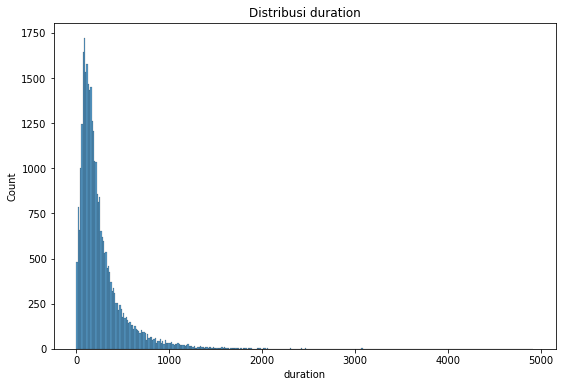

In [44]:
plt.figure(figsize=(9, 6))
sns.histplot(X_train['duration'])
plt.title('Distribusi duration')

* Fitur duration tidak dilakukan winsorizing karena akan menyebabkan munculnya mode kedua (bimode) di value yang terbesar.

Text(0.5, 1.0, 'Distribusi campaign')

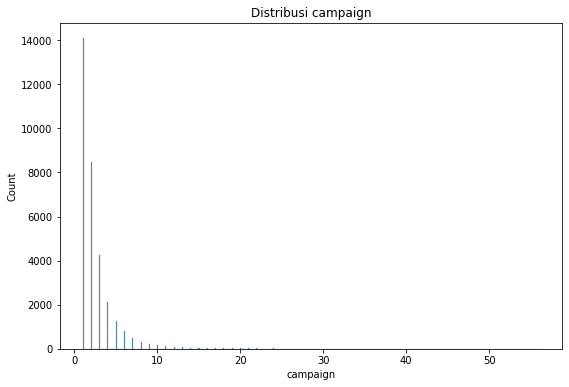

In [45]:
plt.figure(figsize=(9, 6))
sns.histplot(X_train['campaign'])
plt.title('Distribusi campaign')

* Fitur campaign dapat dilakukan winsorizing karena jumlahnya lebih dari 5% dan tidak akan terlalu menyebabkan ketimpangan frekuensi di value terbesar.

* Fitur previous tidak dihandling karena jumlah outliernya yang terlalu banyak dan menyebabkan variasi dari data awal berubah banyak.

* Fitur age dan cons.conf.idx dapat dilakukan trimming karena jumlahnya yang tidak terlalu banyak di bawah 5%.

### Trimming

Trimming fitur age dan cons.conf.idx.

In [46]:
#Outlier hanya ada di bagian upper
upper_conf = outlier(X_train['cons.conf.idx'])[1] # batas atas outlier data cons.conf.idx
upper_age = outlier(X_train['age'])[1] # batas atas outlier data age

# Lakukan trimming terhadap data outlier untuk X_train
X_train = X_train[~
                (
                (X_train['cons.conf.idx'] > upper_conf) &
                (X_train['age'] > upper_age)
                )
]

# Sesuaikan baris y_train dan y_test terhadap data X_train dan X_test yang sudah ditrim
y_train = y_train.loc[X_train.index]

### Winsorizing

Kolom yang akan diwinsorizing adalah campaign.

In [47]:
capping = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5, # 1.5iqr
                          variables=['campaign'], # variabels used for capping
                          missing_values='ignore' # ignore missing value
                          )

capping.fit(X_train)
X_train = capping.transform(X_train)
X_test = capping.transform(X_test)

## Handling Missing Values

Coba kita cek kembali fitur yang mising value.

In [48]:
print('Missing value:')
for col in X_train.columns:
    if missval_pct(X_train[col])[0] > 0:
        print(f'{col} : {missval_pct(X_train[col])[1]:.2f}% or {missval_pct(X_train[col])[0]} data')

Missing value:
job : 0.64% or 264 data
marital : 0.16% or 64 data
education : 3.35% or 1379 data
default : 16.79% or 6913 data
housing : 1.95% or 805 data
loan : 1.95% or 805 data


* Fitur job dan marital

Missing value di kedua fitur ini dapat diimputasi dengan mode karena jumlahnya kurang dari 5%.

In [49]:
X_train['job'].fillna(X_train['job'].mode()[0], inplace=True)
X_train['marital'].fillna(X_train['marital'].mode()[0], inplace=True)

X_test['job'].fillna(X_train['job'].mode()[0], inplace=True)
X_test['marital'].fillna(X_train['marital'].mode()[0], inplace=True)

* Fitur default

In [50]:
X_train['default'].value_counts()

no     25984
yes        2
Name: default, dtype: int64

Ternyata setelah dihitung value countsnya nilai yes hanya 2 data, maka sangat besar kemungkinan value yang missing adalah no.

In [51]:
X_train['default'].fillna('no', inplace=True)

X_test['default'].fillna('no', inplace=True)

* Fitur housing dan loan

Seperti yang sudah diexplor pada EDA, kedua fitur ini memiliki missing value di baris yang sama.

In [52]:
X_train[X_train['housing'].isna() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40090,62,technician,married,NaN,no,NaN,NaN,cellular,jul,mon,220,3.0,999,1,failure,-1.7,94.215,-40.3,0.827,4991.6
26656,34,unemployed,married,high.school,no,NaN,NaN,cellular,nov,thu,72,2.0,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8
2004,57,blue-collar,married,NaN,no,NaN,NaN,telephone,may,mon,98,3.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
19380,46,admin.,single,university.degree,no,NaN,NaN,cellular,aug,wed,311,5.0,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1
16545,30,management,married,university.degree,no,NaN,NaN,cellular,jul,wed,173,2.0,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13793,29,technician,married,professional.course,no,NaN,NaN,cellular,jul,thu,338,6.0,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
17387,43,services,married,basic.6y,no,NaN,NaN,cellular,jul,mon,939,2.0,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
3284,49,self-employed,married,professional.course,no,NaN,NaN,telephone,may,thu,104,2.0,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
21105,33,admin.,married,university.degree,no,NaN,NaN,cellular,aug,mon,73,4.0,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1


In [53]:
X_train['housing'].value_counts(normalize=True)

yes    0.536767
no     0.463233
Name: housing, dtype: float64

Fitur housing dengan persentase missing value kurang dari 5% kita dapat imputasi dengan nilai modenya.

In [54]:
X_train['loan'].value_counts(normalize=True)

no     0.844737
yes    0.155263
Name: loan, dtype: float64

Fitur loan dengan persentase value no yang cukup besar sekitar 84% dan jumlah data yang missing kurang dari 5%, maka cukup aman bila kita imputasi dengan nilai modenya.

In [55]:
X_train['housing'].fillna(X_train['housing'].mode()[0], inplace=True)
X_train['loan'].fillna(X_train['loan'].mode()[0], inplace=True)

X_test['housing'].fillna(X_train['housing'].mode()[0], inplace=True)
X_test['loan'].fillna(X_train['loan'].mode()[0], inplace=True)

* Fitur education

In [56]:
X_train[X_train['education'].isna() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40090,62,technician,married,NaN,no,yes,no,cellular,jul,mon,220,3.0,999,1,failure,-1.7,94.215,-40.3,0.827,4991.6
738,44,blue-collar,married,NaN,no,yes,no,telephone,may,tue,336,3.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
19159,41,admin.,married,NaN,no,yes,no,cellular,aug,tue,214,3.0,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
2004,57,blue-collar,married,NaN,no,yes,no,telephone,may,mon,98,3.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7877,29,technician,single,NaN,no,no,no,telephone,jun,mon,193,4.0,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17244,27,technician,single,NaN,no,yes,no,cellular,jul,fri,266,6.0,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
16873,57,blue-collar,married,NaN,no,yes,no,cellular,jul,thu,240,5.0,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
40552,24,student,single,NaN,no,yes,no,cellular,sep,wed,222,1.0,17,4,failure,-1.1,94.199,-37.5,0.886,4963.6
17138,27,technician,single,NaN,no,yes,no,cellular,jul,fri,238,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1


Terdapat 1379 baris fitur education yang memiliki missing value.

In [57]:
X_train['education'].value_counts(normalize=True) #Cek proporsi value

university.degree      0.307107
high.school            0.243433
basic.9y               0.153490
professional.course    0.132900
basic.4y               0.105044
basic.6y               0.057519
illiterate             0.000508
Name: education, dtype: float64

Karena data uniquenya sangat beragam, disini kita bisa mengimputasi menggunakan random sampel yang diambil sehingga proporsi sampel yang didapatkan sesuai dengan proporsi mula-mula. Hal ini dapat dilakukan karena persentase missing value yang kecil di bawah 5%.

Coba kita hitung jumlah yang missing untuk train dan test.

In [58]:
 #Jumlah missing value untuk train dan test
len_edu_train_na = X_train['education'].isna().sum() #Jumlah missing value
len_edu_test_na = X_test['education'].isna().sum()
len_edu_train_na, len_edu_test_na

(1379, 350)

Selanjutnya diambil data random yang bukan missing dari train sebanyak jumlah yang missing.

In [59]:
#Ambil sampel random dari train sebanyak jumlah yang missing
edu_random_train = X_train['education'].dropna(axis=0).sample(len_edu_train_na, random_state=9)
edu_random_test = X_train['education'].dropna(axis=0).sample(len_edu_test_na, random_state=90)

Membuat dataframe yang semua barisnya di fitur education adalah missing value.

In [60]:
na_train_idx = X_train[X_train['education'].isna() == True]
na_test_idx = X_test[X_test['education'].isna() == True]

Menambal missing value di train dan test dengan datarandom yang sudah dibuat.

In [61]:
for i, index_train in enumerate(na_train_idx.index):
    X_train['education'].loc[index_train] = edu_random_train.iloc[i]

for j, index_test in enumerate(na_test_idx.index):
    X_test['education'].loc[index_test] = edu_random_test.iloc[j]

Coba di cek kembali proporsi datanya.

In [62]:
X_train['education'].value_counts(normalize=True)

university.degree      0.307942
high.school            0.243199
basic.9y               0.153682
professional.course    0.132314
basic.4y               0.104897
basic.6y               0.057479
illiterate             0.000486
Name: education, dtype: float64

Ternyata proporsi masih terjaga dari data awal.

Cek kembali missing value.

In [63]:
X_train.isna().sum().sum()

0

## Feature Selection

In [64]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Fitur pdays memiliki value 999 sebanyak 96% dan value tersebut ditandai sebagai missing. Karena jumlahnya sangat besar, kita dapat menghapus fitur tersebut.

In [65]:
drop_col = ['pdays']

Berdasarkan korelasi fitur numerik yang akan dihapus adalah emp.var.rate dan nr.employed.

In [66]:
drop_col.extend(['emp.var.rate', 'nr.employed'])

Drop fitur yang sudah ditetapkan

In [67]:
X_train.drop(drop_col, axis=1, inplace=True)

## Feature Encoding

Mari kita cek kembali nilai unique dari setiap kolom kategorik.

In [68]:
for objcol in object_col(X_train):
    print('{} : {}'.format(objcol, X_train[objcol].unique()))

job : ['blue-collar' 'services' 'technician' 'admin.' 'management'
 'self-employed' 'retired' 'entrepreneur' 'student' 'housemaid'
 'unemployed']
marital : ['divorced' 'married' 'single']
education : ['basic.4y' 'high.school' 'professional.course' 'university.degree'
 'basic.6y' 'basic.9y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['jul' 'aug' 'may' 'jun' 'apr' 'nov' 'mar' 'sep' 'oct' 'dec']
day_of_week : ['tue' 'wed' 'mon' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']


### OneHot Encoding

Kita lakukan One Hot Encoding untuk kolom kategorik, kita pisahkan terlebih dahulu kolom kategorik.

In [69]:
X_train_cat = X_train[object_col(X_train)]
X_test_cat = X_test[object_col(X_train)]

Kita definisikan dulu fitur yang termasuk nominal.

In [70]:
nom_col = ['contact', 'marital', 'job', 'month', 'day_of_week']

In [71]:
X_train_cat_nom = X_train_cat[nom_col]
X_test_cat_nom = X_test_cat[nom_col]

Definisikan onehotencodernya.

In [72]:
enc = OneHotEncoder(sparse=False)
enc.fit(X_train_cat_nom)

OneHotEncoder(sparse=False)

Kita terapkan transformasi onehot untuk data X_train dan X_test yang berupa kategorik.

In [73]:
X_train_cat_nom_enc = enc.transform(X_train_cat_nom)
X_test_cat_nom_enc = enc.transform(X_test_cat_nom)
pd.DataFrame(X_train_cat_nom_enc)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32894,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32895,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32896,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32897,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Ordinal Encoding

kolom yang termasuk ordinal adalah kolom kategorik yang tidak termasuk nominal.

In [74]:
ord_col = [col for col in object_col(X_train) if col not in nom_col]

In [75]:
X_train[ord_col]

,education,default,housing,loan,poutcome
17795,basic.4y,no,no,no,nonexistent
20585,high.school,no,no,no,nonexistent
21764,professional.course,no,yes,yes,nonexistent
19296,university.degree,no,no,no,nonexistent
36013,university.degree,no,yes,yes,nonexistent
...,...,...,...,...,...
39168,basic.4y,no,yes,no,failure
25544,professional.course,no,yes,no,nonexistent
11513,high.school,no,no,no,nonexistent
1688,high.school,no,yes,yes,nonexistent


In [76]:
for ordcol in ord_col:
    print('{} : {}'.format(ordcol, X_train[ordcol].unique()))

education : ['basic.4y' 'high.school' 'professional.course' 'university.degree'
 'basic.6y' 'basic.9y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
poutcome : ['nonexistent' 'failure' 'success']


Fitur education yang memiliki value basic.4y, basic.6y, basic.9y dapat digabungkan menjadi basic untuk mengurangi cardinality.

In [77]:
X_train_cat_ord_enc = X_train[ord_col].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')
X_test_cat_ord_enc = X_test[ord_col].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')

In [78]:
X_train_cat_ord_enc = np.array(X_train_cat_ord_enc.replace({
    'education': {'illiterate':0, 'basic':1, 'high.school':2, 'professional.course':3, 'university.degree':4},
    'default': {'no':0, 'yes':1},
    'housing': {'no':0, 'yes':1},
    'loan': {'no':0, 'yes':1},
    'poutcome': {'failure':0, 'nonexistent':1, 'success':2}
}))

X_test_cat_ord_enc = np.array(X_test_cat_ord_enc.replace({
    'education': {'illiterate':0, 'basic':1, 'high.school':2, 'professional.course':3, 'university.degree':4},
    'default': {'no':0, 'yes':1},
    'housing': {'no':0, 'yes':1},
    'loan': {'no':0, 'yes':1},
    'poutcome': {'failure':0, 'nonexistent':1, 'success':2}
}))

#### Join OneHot dan Ordinal Encoding

In [79]:
X_test_cat_nom_enc.shape, X_test_cat_ord_enc.shape

((8236, 31), (8236, 5))

Menggabungkan train dan test untuk nominal dan ordinal.

In [80]:
X_train_cat_enc = np.concatenate((X_train_cat_nom_enc, X_train_cat_ord_enc), axis=1)
X_test_cat_enc = np.concatenate((X_test_cat_nom_enc, X_test_cat_ord_enc), axis=1)

### Label Encoding

Kita juga akan melakukan transformasi labelEncoding untuk label y_train dan y_test agar berubah dari kategorik ke numerik.

In [81]:
y_train

17795    no
20585    no
21764    no
19296    no
36013    no
         ..
39168    no
25544    no
11513    no
1688     no
5994     no
Name: y, Length: 32899, dtype: object

Definisikan labelencoder, disesuaikan dengan y_train, lalu transformasi untuk data y_train dan y_test.

In [82]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

Cek y_train.

In [83]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

## Feature Scalling

Kita lihat terlebih dulu kolom yang merupakan numerik.

In [84]:
X_train[numeric_col(X_train)]

,age,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
17795,53,305,1.0,0,93.918,-42.7,4.961
20585,54,321,4.0,0,93.444,-36.1,4.966
21764,38,83,4.0,0,93.444,-36.1,4.964
19296,39,127,1.0,0,93.444,-36.1,4.967
36013,25,500,2.0,0,92.893,-46.2,1.266
...,...,...,...,...,...,...,...
39168,66,141,4.0,2,93.369,-34.8,0.654
25544,32,140,1.0,0,93.200,-42.0,4.120
11513,40,374,1.0,0,94.465,-41.8,4.959
1688,26,2462,1.0,0,93.994,-36.4,4.855


Kolom tersebut memiliki rentang yang berbeda-beda sehingga perlu discalling nilainya. Scalling menggunakan MinMaxScaler karena mayoritas data berdistribusi skew.

Kita definisikan terlebih dahulu kolom numerik untuk X_train dan X_test.

In [85]:
X_train_num = X_train[numeric_col(X_train)]
X_test_num = X_test[numeric_col(X_train)]

Definisikan fungsi MinMaxScaler.

In [86]:
scaler = MinMaxScaler()

Kemudian dilakukan fitting penyesuaian terhadap kolom numerik X_train.

In [87]:
scaler.fit(X_train_num)

MinMaxScaler()

Terapkan tranformasi ke data train dan data test.

In [88]:
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
pd.DataFrame(X_train_num_scaled)

,0,1,2,3,4,5,6
0,0.461538,0.062017,0.0,0.000000,0.669135,0.338912,0.980957
1,0.474359,0.065270,0.6,0.000000,0.484412,0.615063,0.982090
2,0.269231,0.016877,0.6,0.000000,0.484412,0.615063,0.981637
3,0.282051,0.025824,0.0,0.000000,0.484412,0.615063,0.982317
4,0.102564,0.101667,0.2,0.000000,0.269680,0.192469,0.143278
...,...,...,...,...,...,...,...
32894,0.628205,0.028670,0.6,0.285714,0.455183,0.669456,0.004534
32895,0.192308,0.028467,0.0,0.000000,0.389322,0.368201,0.790297
32896,0.294872,0.076047,0.0,0.000000,0.882307,0.376569,0.980503
32897,0.115385,0.500610,0.0,0.000000,0.698753,0.602510,0.956926


## Join Categorical and Numerical Columns
Menggabungkan kolom categorical yang telah diencoding and kolom numerical yang telah discalling.

In [89]:
X_train_final = np.concatenate((X_train_cat_enc, X_train_num_scaled), axis=1)
X_test_final = np.concatenate((X_test_cat_enc, X_test_num_scaled), axis=1)

In [90]:
pd.DataFrame(X_train_final)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.461538,0.062017,0.0,0.000000,0.669135,0.338912,0.980957
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.474359,0.065270,0.6,0.000000,0.484412,0.615063,0.982090
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.269231,0.016877,0.6,0.000000,0.484412,0.615063,0.981637
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.282051,0.025824,0.0,0.000000,0.484412,0.615063,0.982317
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.102564,0.101667,0.2,0.000000,0.269680,0.192469,0.143278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32894,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.628205,0.028670,0.6,0.285714,0.455183,0.669456,0.004534
32895,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.192308,0.028467,0.0,0.000000,0.389322,0.368201,0.790297
32896,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.294872,0.076047,0.0,0.000000,0.882307,0.376569,0.980503
32897,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.115385,0.500610,0.0,0.000000,0.698753,0.602510,0.956926


# VI. Model Definition

Pendefinisian model dengan algoritma yang sudah ditentukan.

In [125]:
logreg = LogisticRegression()
svc = LinearSVC()
dtree = DecisionTreeClassifier()
ranfor = RandomForestClassifier()
knn = KNeighborsClassifier()
bayes = MultinomialNB()
gdesc = SGDClassifier()

Cross validation untuk logistic regression.

In [126]:
%%time
acc_train_cv_logreg = cross_val_score(logreg, 
                                      X_train_final, 
                                      y_train, 
                                      cv=9, scoring="accuracy")

CPU times: user 42.1 s, sys: 28.3 s, total: 1min 10s
Wall time: 11.4 s


Cross validation untuk support vector classifier.

In [127]:
%%time
acc_train_cv_svc = cross_val_score(svc, 
                                      X_train_final, 
                                      y_train, 
                                      cv=9, scoring="accuracy")

CPU times: user 34.8 s, sys: 3.85 s, total: 38.6 s
Wall time: 31.6 s


Cross validation untuk decision tree.

In [128]:
%%time
acc_train_cv_dtree = cross_val_score(dtree, 
                                      X_train_final, 
                                      y_train, 
                                      cv=9, scoring="accuracy")

CPU times: user 2.09 s, sys: 7.74 ms, total: 2.09 s
Wall time: 2.1 s


Cross validation untuk random forest.

In [130]:
%%time
acc_train_cv_ranfor = cross_val_score(ranfor, 
                                      X_train_final, 
                                      y_train, 
                                      cv=9, scoring="accuracy")

CPU times: user 26.2 s, sys: 82.2 ms, total: 26.3 s
Wall time: 26.3 s


Cross validation untuk k-nearest neighbors.

In [131]:
%%time
acc_train_cv_knn = cross_val_score(knn, 
                                      X_train_final, 
                                      y_train, 
                                      cv=9, scoring="accuracy")

CPU times: user 32.4 s, sys: 51.8 s, total: 1min 24s
Wall time: 30.5 s


Cross validation untuk naive bayes multinomial.

In [132]:
%%time
acc_train_cv_bayes = cross_val_score(bayes, 
                                      X_train_final, 
                                      y_train, 
                                      cv=9, scoring="accuracy")

CPU times: user 636 ms, sys: 481 ms, total: 1.12 s
Wall time: 197 ms


Cross validation untuk stochastic gradient descent.

In [133]:
%%time
acc_train_cv_gdesc = cross_val_score(gdesc, 
                                      X_train_final, 
                                      y_train, 
                                      cv=9, scoring="accuracy")

CPU times: user 5.55 s, sys: 3.99 s, total: 9.54 s
Wall time: 2.25 s


## VII. Model Training

Melatih model untuk data train dengan berbagai algoritma supervised learning.

In [134]:
logreg.fit(X_train_final, y_train)
svc.fit(X_train_final, y_train)
dtree.fit(X_train_final, y_train)
ranfor.fit(X_train_final, y_train)
knn.fit(X_train_final, y_train)
bayes.fit(X_train_final, y_train)
gdesc.fit(X_train_final, y_train)

SGDClassifier()

Model diuji dengan seluruh algoritma dan disimpan hasil prediksi train test untuk masing-masing model.

In [135]:
y_pred_train_logreg = logreg.predict(X_train_final)
y_pred_test_logreg = logreg.predict(X_test_final)

y_pred_train_svc = svc.predict(X_train_final)
y_pred_test_svc = svc.predict(X_test_final)

y_pred_train_dtree = dtree.predict(X_train_final)
y_pred_test_dtree = dtree.predict(X_test_final)

y_pred_train_ranfor = ranfor.predict(X_train_final)
y_pred_test_ranfor = ranfor.predict(X_test_final)

y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)

y_pred_train_bayes = bayes.predict(X_train_final)
y_pred_test_bayes = bayes.predict(X_test_final)

y_pred_train_gdesc = gdesc.predict(X_train_final)
y_pred_test_gdesc = gdesc.predict(X_test_final)

### Hyperparameter Tuning

Hyperparameter tuning dari model yang terbaik berdasarkan baseline model.

* Random Forest

Referensi: [Random Forest - Hyperparameters and how to fine-tune them](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d)

Define hyperparameter yang ingin dituning.

In [136]:
param_grid_ranfor = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3],
    'max_features': ['sqrt', 'log2'],
    'n_jobs' : [-1]
    }

param_grid_ranfor

{'n_estimators': [50, 100, 150],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 3],
 'max_features': ['sqrt', 'log2'],
 'n_jobs': [-1]}

Melakukan GridSearch cross validation terhadap hyperparameter yang telah ditentukan.

> Perhatian! Proses ini mungkin membutuhkan waktu beberapa menit, pastikan resouces anda memadai.

In [137]:
# Train with Grid Search
gridcv_ranfor = GridSearchCV(estimator=ranfor,
                         param_grid=param_grid_ranfor,
                         cv=9,
                         n_jobs=-1,
                         verbose=2)

gridcv_ranfor.fit(X_train_final, y_train)

Fitting 9 folds for each of 24 candidates, totalling 216 fits
[CV] END criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   4.9s
[CV] END criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   5.0s
[CV] END criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   5.1s
[CV] END criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   5.2s
[CV] END criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   5.2s
[CV] END criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   5.2s
[CV] END criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   5.2s
[CV] END criterion=gini, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   5.3s
[CV] END criterion=gini, max_features=sqrt

GridSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 150], 'n_jobs': [-1]},
             verbose=2)

Melihat hyperparameter terbaik yang didapatkan.

In [156]:
gridcv_ranfor.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 150,
 'n_jobs': -1}

Menguji model GridSearchCV dengan data test.

In [157]:
y_pred_test_ranfor_gridcv = gridcv_ranfor.predict(X_test_final)

## VIII. Model Evaluation

Definisikan fungsi untuk mencetak hasil cross validation baseline model.

In [148]:
def print_cv(algorithm, cv, y_pred_test):
    algo = {
        'logreg': 'Logistic Regression',
        'svc': 'Support Vector Classifier',
        'dtree': 'Decision Tree',
        'ranfor': 'Random Forest',
        'knn': 'K-Nearest Neighbors',
        'bayes': 'Naive Bayes Multinomial',
        'gdesc': 'Stochastic Gradient Descent'
    }
    print(algo[algorithm])
    print('Accuracy - Min - Cross Validation  : {:.4f}'.format(cv.min()))
    print('Accuracy - Max - Cross Validation  : {:.4f}'.format(cv.max()))
    print('Accuracy - Mean - Cross Validation : {:.4f}'.format(cv.mean()))
    print('Accuracy - Std - Cross Validation  : {:.4f}'.format(cv.std()))
    print('Accuracy - Range of Test-Set       : {:.4f} - {:.4f}'.format(cv.mean()-cv.std(), cv.mean()+cv.std()))
    print('Testing accuracy                   : {:.4f}'.format(accuracy_score(y_test, y_pred_test)))

* Logistic Regression

In [149]:
print_cv('logreg', acc_train_cv_logreg, y_pred_test_logreg)

Logistic Regression
Accuracy - Min - Cross Validation  : 0.9056
Accuracy - Max - Cross Validation  : 0.9141
Accuracy - Mean - Cross Validation : 0.9092
Accuracy - Std - Cross Validation  : 0.0027
Accuracy - Range of Test-Set       : 0.9065 - 0.9120
Testing accuracy                   : 0.9065


* Support Vector Machine - Classifier


In [150]:
print_cv('svc', acc_train_cv_svc, y_pred_test_svc)

Support Vector Classifier
Accuracy - Min - Cross Validation  : 0.9034
Accuracy - Max - Cross Validation  : 0.9136
Accuracy - Mean - Cross Validation : 0.9080
Accuracy - Std - Cross Validation  : 0.0032
Accuracy - Range of Test-Set       : 0.9048 - 0.9112
Testing accuracy                   : 0.9044


* Decision Tree

In [151]:
print_cv('dtree', acc_train_cv_dtree, y_pred_test_dtree)

Decision Tree
Accuracy - Min - Cross Validation  : 0.8824
Accuracy - Max - Cross Validation  : 0.9007
Accuracy - Mean - Cross Validation : 0.8904
Accuracy - Std - Cross Validation  : 0.0048
Accuracy - Range of Test-Set       : 0.8855 - 0.8952
Testing accuracy                   : 0.8840


* Random Forest

In [152]:
print_cv('ranfor', acc_train_cv_ranfor, y_pred_test_ranfor)

Random Forest
Accuracy - Min - Cross Validation  : 0.9100
Accuracy - Max - Cross Validation  : 0.9171
Accuracy - Mean - Cross Validation : 0.9136
Accuracy - Std - Cross Validation  : 0.0020
Accuracy - Range of Test-Set       : 0.9115 - 0.9156
Testing accuracy                   : 0.9092


* K-Nearest Neighbors Classifier

In [153]:
print_cv('knn', acc_train_cv_knn, y_pred_test_knn)

K-Nearest Neighbors
Accuracy - Min - Cross Validation  : 0.8826
Accuracy - Max - Cross Validation  : 0.8936
Accuracy - Mean - Cross Validation : 0.8901
Accuracy - Std - Cross Validation  : 0.0033
Accuracy - Range of Test-Set       : 0.8869 - 0.8934
Testing accuracy                   : 0.8822


* Naive Bayes Multinomial

In [154]:
print_cv('bayes', acc_train_cv_bayes, y_pred_test_bayes)

Naive Bayes Multinomial
Accuracy - Min - Cross Validation  : 0.8856
Accuracy - Max - Cross Validation  : 0.8933
Accuracy - Mean - Cross Validation : 0.8882
Accuracy - Std - Cross Validation  : 0.0024
Accuracy - Range of Test-Set       : 0.8859 - 0.8906
Testing accuracy                   : 0.8805


* Stochastic Gradient Descent

In [155]:
print_cv('gdesc', acc_train_cv_gdesc, y_pred_test_gdesc)

Stochastic Gradient Descent
Accuracy - Min - Cross Validation  : 0.9023
Accuracy - Max - Cross Validation  : 0.9133
Accuracy - Mean - Cross Validation : 0.9070
Accuracy - Std - Cross Validation  : 0.0032
Accuracy - Range of Test-Set       : 0.9038 - 0.9101
Testing accuracy                   : 0.9031


> Berdasarkan hasil training cross validation didapatkan rata-rata akurasi untuk setiap baseline model. Model yang memiliki akurasi terbesar adalah random forest dan model yang memiliki akurasi terendah adalah naive bayes multinomial.

Dari hasil rata-rata akurasi cross validasi kita akan membandingkan dengan akurasi data testing. Kita bisa melihat metrik evaluasi menggunakan classification_report atau accuracy_score untuk algoritma terbaik menggunakan gridcv.

In [159]:
print(f'Akurasi for Random Forest with GridSearchCV : {accuracy_score(y_test, y_pred_test_ranfor_gridcv):.4f}')

Akurasi for Random Forest with GridSearchCV : 0.9119


In [160]:
print('classification_report for Stochastic Gradient Descent')
print(classification_report(y_test, y_pred_test_ranfor_gridcv))

classification_report for Stochastic Gradient Descent
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7259
           1       0.68      0.49      0.57       977

    accuracy                           0.91      8236
   macro avg       0.81      0.73      0.76      8236
weighted avg       0.90      0.91      0.91      8236



Nilai support terlihat bahwa jumlah data test antara 0 dan 1 adalah **imbalance**. Karena data imbalance sebaiknya digunakan metrik lain yaitu ROC AUC score. Kita akan menghitung ROC AUC score untuk cross validation dan setelah dilakukan hyperparameter tuning menggunakan GridSearchCV.

#### ROC AUC Score

In [180]:
%%time
rocauc_train_cv_ranfor = cross_val_score(ranfor, 
                                      X_train_final, 
                                      y_train, 
                                      cv=9, scoring="roc_auc")

CPU times: user 23.8 s, sys: 69.8 ms, total: 23.9 s
Wall time: 23.9 s


Sebelum dilakukan GridSearchCV.

In [182]:
cv = rocauc_train_cv_ranfor
print('Random Forest')
print('ROC_AUC_score Mean - Cross Validation : {:.4f}'.format(cv.mean()))
print('ROC_AUC_score Std - Cross Validation  : {:.4f}'.format(cv.std()))
print('ROC_AUC_score Range of Test-Set       : {:.4f} - {:.4f}'.format(cv.mean()-cv.std(), cv.mean()+cv.std()))

Random Forest
ROC_AUC_score Mean - Cross Validation : 0.9408
ROC_AUC_score Std - Cross Validation  : 0.0040
ROC_AUC_score Range of Test-Set       : 0.9368 - 0.9449


Setelah dilakukan GridSearchCV. 
Mencoba menghitung probabilitas hasil prediksi. Kolom kiri adalah untuk value 0 dan kolom kanan adalah untuk value 1.

In [186]:
y_pred_proba_test_ranfor_gridcv = gridcv_ranfor.predict_proba(X_test_final)
y_pred_proba_test_ranfor_gridcv

array([[0.99555556, 0.00444444],
       [0.50777778, 0.49222222],
       [0.97666667, 0.02333333],
       ...,
       [0.99555556, 0.00444444],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [190]:
print('ROC_AUC_score - GridSearchCV : {:.4f}'.format(roc_auc_score(y_test, y_pred_proba_test_ranfor_gridcv[:, 1])))

ROC_AUC_score - GridSearchCV : 0.9450


Nilai ROC AUC setelah dilakukan GridSearchCV **lebih besar** dibandingkan dengan rata-rata ROC AUC saat cross validation. Hal ini membuktikan hyperparameter tuning yang dilakukan mampu meningkatkan performa model. Nilai ROC AUC yang diperoleh termasuk kategori *excellent*.

Referensi kategori [ROC AUC Evaluation](https://www.researchgate.net/figure/ROC-curve-and-ROC-score-categories_fig3_322161039)

## IX. Model Inference


Load data inferens.

In [161]:
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,unemployed,married,basic.4y,NaN,yes,no,telephone,jul,tue,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
1,33,services,married,professional.course,no,yes,no,cellular,may,tue,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
2,29,admin.,single,university.degree,no,yes,no,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
3,30,admin.,divorced,high.school,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
4,45,blue-collar,married,high.school,NaN,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
5,43,admin.,married,university.degree,NaN,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
6,35,NaN,single,high.school,NaN,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
7,34,technician,married,university.degree,no,yes,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Handling Missing Value

Cek missing value.

In [162]:
data_inf.isna().sum().sort_values(ascending=False).head()

default        4
job            1
age            0
pdays          0
nr.employed    0
dtype: int64

Imputasi missing value dengan mode.

In [163]:
data_inf['default'].fillna(X_train['default'].mode()[0], inplace=True)
data_inf['job'].fillna(X_train['job'].mode()[0], inplace=True)

### Feature Selection

Lakukan feature selection sesuai preprocessing.

In [164]:
data_inf.drop(drop_col, axis=1, inplace=True)

### Feature Encoding

#### OneHotEncoding

Lakukan onehotencoding untuk fitur nominal seperti preprocessing.

In [165]:
data_inf_cat_nom = data_inf[nom_col]

In [166]:
data_inf_cat_nom_enc = enc.transform(data_inf_cat_nom)
pd.DataFrame(data_inf_cat_nom_enc)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Ordinal Encoding

Lakukan ordinal encoding untuk fitur ordinal seperti preprocessing.

In [167]:
data_inf_cat_ord_enc = data_inf[ord_col].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')
data_inf_cat_ord_enc = np.array(data_inf_cat_ord_enc.replace({
    'education': {'illiterate':0, 'basic':1, 'high.school':2, 'professional.course':3, 'university.degree':4},
    'default': {'no':0, 'yes':1},
    'housing': {'no':0, 'yes':1},
    'loan': {'no':0, 'yes':1},
    'poutcome': {'failure':0, 'nonexistent':1, 'success':2}
}))

#### Join Onehot and Ordinal Encoding

Menggabungkan fitur nominal dan ordinal yang telah diencoding.

In [168]:
data_inf_cat_enc = np.concatenate((data_inf_cat_nom_enc, data_inf_cat_ord_enc), axis=1)

### Feature Scalling

Scalling fitur numerik seperti pada preprocessing.

In [169]:
data_inf_num = data_inf[numeric_col(data_inf)]

In [170]:
data_inf_num

,age,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
0,49,275,4,0,93.918,-42.7,4.961
1,33,335,2,0,92.893,-46.2,1.344
2,29,79,3,0,93.444,-36.1,4.966
3,30,131,2,0,93.200,-42.0,4.120
4,45,969,1,0,93.444,-36.1,4.965
5,43,2016,2,0,93.994,-36.4,4.855
6,35,277,3,0,93.918,-42.7,4.958
7,34,226,2,0,93.994,-36.4,4.857


In [171]:
data_inf_num_scaled = scaler.transform(data_inf_num)
pd.DataFrame(data_inf_num_scaled)

,0,1,2,3,4,5,6
0,0.410256,0.055917,0.6,0.0,0.669135,0.338912,0.980957
1,0.205128,0.068117,0.2,0.0,0.269680,0.192469,0.160961
2,0.153846,0.016063,0.4,0.0,0.484412,0.615063,0.982090
3,0.166667,0.026637,0.2,0.0,0.389322,0.368201,0.790297
4,0.358974,0.197031,0.0,0.0,0.484412,0.615063,0.981864
5,0.333333,0.409923,0.2,0.0,0.698753,0.602510,0.956926
6,0.230769,0.056324,0.4,0.0,0.669135,0.338912,0.980277
7,0.217949,0.045954,0.2,0.0,0.698753,0.602510,0.957379


### Join Numerical dan Categorical Columns

Menggabungkan fitur numerik dan kateogorik.

In [172]:
data_inf_final = np.concatenate((data_inf_cat_enc, data_inf_num_scaled), axis=1)
pd.DataFrame(data_inf_final)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.410256,0.055917,0.6,0.0,0.669135,0.338912,0.980957
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.205128,0.068117,0.2,0.0,0.269680,0.192469,0.160961
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.153846,0.016063,0.4,0.0,0.484412,0.615063,0.982090
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.166667,0.026637,0.2,0.0,0.389322,0.368201,0.790297
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.358974,0.197031,0.0,0.0,0.484412,0.615063,0.981864
5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.333333,0.409923,0.2,0.0,0.698753,0.602510,0.956926
6,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.230769,0.056324,0.4,0.0,0.669135,0.338912,0.980277
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.217949,0.045954,0.2,0.0,0.698753,0.602510,0.957379


### Model Prediction
Prediksi label menggunakan beberapa model yang telah di fitted.

In [173]:
y_pred_inf_logreg = logreg.predict(data_inf_final)
le.inverse_transform(y_pred_inf_logreg)

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no'], dtype=object)

In [174]:
y_pred_inf_svc = svc.predict(data_inf_final)
le.inverse_transform(y_pred_inf_svc)

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no'], dtype=object)

In [175]:
y_pred_inf_dtree = dtree.predict(data_inf_final)
le.inverse_transform(y_pred_inf_dtree)

array(['no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no'], dtype=object)

In [176]:
y_pred_inf_ranfor = ranfor.predict(data_inf_final)
le.inverse_transform(y_pred_inf_ranfor)

array(['no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no'], dtype=object)

In [177]:
y_pred_inf_knn = knn.predict(data_inf_final)
le.inverse_transform(y_pred_inf_knn)

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'], dtype=object)

In [178]:
y_pred_inf_bayes = bayes.predict(data_inf_final)
le.inverse_transform(y_pred_inf_bayes)

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'], dtype=object)

In [179]:
y_pred_inf_gdesc = gdesc.predict(data_inf_final)
le.inverse_transform(y_pred_inf_gdesc)

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no'], dtype=object)

Dari keseluruhan model untuk data inferens ada 3 perbedaan hasil yang dihasilkan yaitu:
1. Keseluruhan label no : KNN, NaiveBayes Multinomial
2. Label yes index -3 : Logistic Regression, SVC, dan SGradientClassifier
3. Label yes index -4 : Decision Tree, Random Forest

## X. Kesimpulan

```
1. Dataset bank-additional-full.csv dengan label y dan terdiri dari 20 fitur.

2. Fitur yang termasuk kategorik adalah sebagai berikut:
    job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome.

3. Fitur yang termasuk numerik adalah sebagai berikut:
    age, duration, campaign, pdays,  previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.

4. Fitur yang tidak digunakan untuk pemodelan adalah:
    pdays, emp.var.rate, nr.employed.

5. Model yang dilatih pada dataset ini adalah sebagai berikut:
    * Logistic Regression
    * Support Vector Classifier
    * Decision Tree
    * Random Forest
    * K-Nearest Neighbors
    * Naive Bayes Multinomial
    * Stochastic Gradient Descent

6. Setiap baseline model dengan hyperparameter default dilakukan cross validation menghasilkan akurasi sebagai berikut:
    * 0.9092 ± 0.0027 : Logistic Regression
    * 0.9080 ± 0.0032 : Support Vector Classifier
    * 0.8904 ± 0.0048 : Decision Tree
    * 0.9136 ± 0.0020 : Random Forest
    * 0.8901 ± 0.0033 : K-Nearest Neighbors
    * 0.8882 ± 0.0024 : Naive Bayes Multinomial
    * 0.9070 ± 0.0032 : Stochastic Gradient Descent

7. Model terbaik yang didapatkan adalah ranfom forest dan dilakukan GridSearchCV untuk hyperparameter tuning dan didapatkan akurasi testing sebesar 0.9119. Akurasi ini berarti kira-kira dalam 100 data hasil prediksi terdapat sekitar 91 data yang prediksinya tepat dan 9 data yang prediksinya tidak tepat. 

8. Perhitungan skor ROC AUC sebagai metrik evaluasi random forest setelah dilakukan GridSearchCV adalah 0.9450 dan terjadi peningkatan performa model bila dibandingkan dengan rata-rata skor ROC AUC saat training cross validation yaitu 0.9408.
```